In [ ]:
# Computer Science - CSC-557-U15-92793
# Nov 26, 2021
# Data Analysis, Decision Making, and Visualization
# Professor: Vijayalakshmi Saravanan
# Created By:
# Jose David Cortes (jose.d.cortes@coyotes.usd.edu | josedavidcortes.ai@gmail.com)
# Bhulakshmi Kunchala (bhulakshmi.kunchala@coyotes.usd.edu) 
# ANALYSIS OF GREEN ENERGY (WIND & SOLAR)
from google.colab import drive
drive.mount('/content/drive/')
# this code is optional.
# Just to connect to google drive(personal) is you have the 
# data set(local or cloud) this is not necessary 

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


# ANALYSIS OF GREEN ENERGY IN EUROPE(SOLAR & WIND) [1 of 3]
---
## **Solar Energy Generation per Country (Europe)**

## Description of the data set

The dataset contain hourly estimates of an area's energy potential for 1986-2015 as a percentage of a power plant's maximum output.

The general scope of [EMHIRES](https://ec.europa.eu/jrc/en/scientific-tool/emhires) is to allow users to assess the impact of meteorological and wheater variability on the generation of solar power in Europe and not to mime the actual evolution of solar power production in the latest decades. For this reason, the hourly solar power generation time series are released for meteorological conditions of the years 1986-2015 (30 years) without considering any changes in the solar installed capacity. Thus, the installed capacity considered is fixed as the one installed at the end of 2015. For this reason, data from EMHIRES should not be compared with actual power generation data other than referring to the reference year 2015.

The data is available at both the national level and the [NUTS 2](https://en.wikipedia.org/wiki/Nomenclature_of_Territorial_Units_for_Statistics) level. 
The **NUTS 2**(Nomenclature of Territorial Units for Statistics) system divides the EU into 276 statistical units.
Please see the manual for the technical details of how these estimates were generated.
This product is intended for policy analysis over a wide area and is not the best for estimating the output from a single system. Please don't use it commercially.

# **Goal** [1 of 3]
We are going to study the Solar Generation on a country level in order to make cluster of country which present the same profile so that each group can be investigate in more details later.

In [ ]:
# import required libraries
import numpy as np
import pandas as pd
from scipy import stats
import seaborn as sns
import matplotlib.pyplot as plt

pd.options.display.max_columns = 300

import warnings
warnings.filterwarnings("ignore")

# Just in case we wants to export to Excel(.xlxs)
# !pip install openpyxl (install the library)
# df_solar_co.to_excel(r'Path\File_Name.xlsx', sheet_name='Your sheet name', index = False)


In [ ]:
#let's check our data set for each country
df_solar_co = pd.read_excel("/content/drive/MyDrive/Colab Notebooks/datasets/EMHIRESPV_SOLAR_TSh_CF_Country.xlsx")
df_solar_co.head(2)

,Time_step,Date,Year,Month,Day,Hour,AL,AT,BA,BE,BG,CH,CY,CZ,DE,DK,EE,ES,FI,FR,EL,HR,HU,IE,IT,LT,LU,LV,ME,MK,NL,NO,PL,PT,RO,RS,SI,SK,SE,XK,UK
0,1,1986-01-01 00:00:00,1986,1,1,0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2,1986-01-01 01:00:00,1986,1,1,1,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
# this is in case I need only the country columns
#print(df_solar_co.iloc[:, 6 : 42])
df_solar_co.iloc[0:0, 6 : 42]
# We dont need this information ['Time_step', 'Date', 'Year', 'Month', 'Day', 'Hour'] in this moment, so lets removed it.
df_solar_co = df_solar_co.drop(columns=['Time_step', 'Date', 'Year', 'Month', 'Day', 'Hour'])
# Now each column represent a country(from 6s column), we can list them easily :
df_solar_co.columns
# If needed(we use this dictionary at the end of this document), here is a dictionnary in python that can help us to make the 
# conversion between the 2 letters and the real name of each country :
country_dict = {
'AT': 'Austria',
'AL': 'Albania',
'BE': 'Belgium',
'BA': 'Bosnia and Herzegovina',
'BG': 'Bulgaria',
'CH': 'Switzerland',
'CY': 'Cyprus',
'CZ': 'Czech Republic',
'DE': 'Germany',
'DK': 'Denmark',
'EE': 'Estonia',
'ES': 'Spain',
'FO': 'Faroe Islands',
'FI': 'Finland',
'FR': 'France',
'EL': 'Greece',
'GE': 'Georgia',
'GI': 'Gibraltar',
'UK': 'United Kingdom',
'HU': 'Hungary',
'HR': 'Croatia',
'IE': 'Ireland',
'IS': 'Iceland',
'IM': 'Isle of Man',
'IT': 'Italy',
'XK': 'Kosovo',
'LI': 'Liechtenstein',
'LT': 'Lithuania',
'LU': 'Luxembourg',
'LV': 'Latvia',
'MK': 'Macedonia',
'MT': 'Malta',
'MD': 'Moldova',
'MC': 'Monaco',
'ME': 'Montenegro',
'NO': 'Norway',
'NL': 'Netherlands',
'PL': 'Poland',
'PT': 'Portugal',
'RO': 'Romania',
'RU': 'Russian Federation',
'RS': 'Serbia',
'SE': 'Sweden',
'SM': 'San Marino',
'SI': 'Slovenia',
'SK': 'Slovakia',
'TR': 'Turkey',
'UA': 'Ukraine',
'VA': 'Vatican City State'
}

In [ ]:
# How many columns and lines of records do we have in EMHIRESPV_SOLAR_TSh_CF_Country after remove 
# the columns['Time_step', 'Date', 'Year', 'Month', 'Day', 'Hour']:
df_solar_co.shape

(262968, 35)

In [ ]:
df_solar_nu = pd.read_excel("/content/drive/MyDrive/Colab Notebooks/datasets/EMHIRES_SOLAR_PVGIS_TSh_CF_n2.xlsx")
df_solar_nu.columns
df_solar_nu = df_solar_nu.drop(columns=['time_step'])
df_solar_nu.tail(2)

,AT11,AT21,AT12,AT31,AT32,AT22,AT33,AT34,AT13,BE21,BE31,BE32,BE33,BE22,BE34,BE35,BE23,BE10,BE24,BE25,BG32,BG33,BG31,BG34,BG41,BG42,CZ06,CZ03,CZ08,CZ01,CZ05,CZ04,CZ02,CZ07,DEA5,DE30,DE40,DE91,DE50,DED1,DE71,DEE1,DEA4,DED2,DEA1,DE13,DE72,DEE2,DE60,DE92,DE12,DE73,DEB1,DEA2,DED3,DE93,DEE3,DE80,DE25,DEA3,DE22,DE21,DE24,DE23,DEB3,DEF0,DE27,DE11,DEG0,DEB2,DE14,DE26,DE94,ES61,ES24,ES12,ES13,ES41,ES42,ES51,ES30,ES52,ES43,ES11,ES53,ES23,ES22,ES21,ES62,FI20,FI1C,FI1D,FI1B,FI19,FR42,FR61,FR72,FR25,FR26,FR52,FR24,FR21,FR83,FR43,FR23,FR10,FR81,FR63,FR41,FR62,FR30,FR51,FR22,FR53,FR82,FR71,EL51,EL30,EL63,EL53,EL62,EL54,EL52,EL43,EL42,EL65,EL64,EL61,EL41,HU33,HU23,HU32,HU31,HU21,HU10,HU22,CH02,CH03,CH05,CH01,CH07,CH06,CH04,IE01,IE02,ITF1,ITF5,ITF6,ITF3,ITH5,ITH4,ITI4,ITC3,ITC4,ITI3,ITF2,ITC1,ITF4,ITG2,ITG1,ITI1,ITH2,ITI2,ITC2,ITH3,NL13,NL23,NL12,NL22,NL11,NL42,NL41,NL32,NL21,NL31,NL34,NL33,NO04,NO02,NO01,NO03,NO05,PL51,PL61,PL31,PL43,PL11,PL21,PL12,PL52,PL32,PL34,PL63,PL22,PL33,PL62,PL41,PL42,PT18,PT15,PT16,PT17,PT11,RO32,RO12,RO21,RO11,RO31,RO22,RO41,RO42,SE32,SE31,SE12,SE33,SE21,SE11,SE22,SE23,SK01,SK03,SK04,SK02,UKH2,UKJ1,UKD6,UKK3,UKD1,UKF1,UKK4,UKK2,UKH1,UKE1,UKL2,UKM2,UKH3,UKK1,UKD3,UKJ3,UKG1,UKM6,UKI3UKI4,UKJ4,UKD4,UKF2,UKF3,UKD7,UKM5,UKE2,UKN0,UKC2,UKI5UKI6,UKG2,UKM3,UKE3,UKJ2,UKC1,UKG3,UKL1,UKE4
262966,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
262967,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
df_solar_nu.shape

(262968, 260)

##**Groups of countries or regions with similar profiles**
##**Clustering** with the KMean model

The word ‘**clustering**’ means grouping similar things together. The most commonly used clustering method is K-Means (because of it’s simplicity).
The main purpose of clustering is to identify distinct groups in a dataset such that the observations within a group are similar to each other but different from observations in other groups. 
In k-means clustering, we specify the number of desired clusters k, and the algorithm will assign each observation to exactly one of these k clusters. The algorithm optimizes the groups by minimizing the within-cluster variation (also known as inertia) such that the sum of the within-cluster variations across all k clusters is as small as possible.

Different runs of k-means will give us slightly different cluster assignments because k-means assigns randomly each observation to one of the k clusters to kick off the clustering process.
k-means does this random initialization to speed up the clustering process. 
After this, k-means reassigns the observations to different clusters as it attempts to minimize the Euclidean distance between each observation and its cluster’s center point, or centroid. This random initialization is a source of randomness, resulting in slightly different clustering assignments, from one k-means run to another.

Typically, the k-means algorithm does several runs and chooses the run that has the best separation, defined as the lowest total sum of within-cluster variations across all k clusters.

## **Evaluating the cluster quality**
The goal here isn’t just to make clusters, but to make good, meaningful clusters. Quality clustering is when the datapoints within a cluster are close together, and afar from other clusters. The two methods to measure the cluster quality are described below:

**Inertia**: Intuitively, inertia tells how far away the points within a cluster are. Therefore, a small of inertia is aimed for. The range of inertia’s value starts from zero and goes up.
Silhouette score: Silhouette score tells how far away the datapoints in one cluster are, from the datapoints in another cluster. The range of silhouette score is from -1 to 1. Score should be closer to 1 than -1.
Reference : Towards Data Science.

**Optimal K**: the **elbow** method

**How many clusters would we need?**
A common, empirical method, is the elbow method. You plot the mean distance of every point toward its cluster center, as a function of the number of clusters. Sometimes the plot has an arm shape, and the elbow would be the optimal K.

In [ ]:
# Groups of countries(or regions) with similar profiles
# Clustering with the KMean model
# The objective of clustering is to identify distinct groups 
# in a dataset such that the observations within a group are 
# similar to each other but different from observations in other groups.

#Optimal K: the elbow method

from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [ ]:
# NUTS 2 level
# Let's keep the records of one year and tranpose the dataset, 
# because we need to have one line per region.

df_solar_transposed = df_solar_nu[-24*365:].T
df_solar_transposed.fillna(0,inplace=True)
df_solar_transposed.tail(2)

,254208,254209,254210,254211,254212,254213,254214,254215,254216,254217,254218,254219,254220,254221,254222,254223,254224,254225,254226,254227,254228,254229,254230,254231,254232,254233,254234,254235,254236,254237,254238,254239,254240,254241,254242,254243,254244,254245,254246,254247,254248,254249,254250,254251,254252,254253,254254,254255,254256,254257,254258,254259,254260,254261,254262,254263,254264,254265,254266,254267,254268,254269,254270,254271,254272,254273,254274,254275,254276,254277,254278,254279,254280,254281,254282,254283,254284,254285,254286,254287,254288,254289,254290,254291,254292,254293,254294,254295,254296,254297,254298,254299,254300,254301,254302,254303,254304,254305,254306,254307,254308,254309,254310,254311,254312,254313,254314,254315,254316,254317,254318,254319,254320,254321,254322,254323,254324,254325,254326,254327,254328,254329,254330,254331,254332,254333,254334,254335,254336,254337,254338,254339,254340,254341,254342,254343,254344,254345,254346,254347,254348,254349,254350,254351,254352,254353,254354,254355,254356,254357,...,262818,262819,262820,262821,262822,262823,262824,262825,262826,262827,262828,262829,262830,262831,262832,262833,262834,262835,262836,262837,262838,262839,262840,262841,262842,262843,262844,262845,262846,262847,262848,262849,262850,262851,262852,262853,262854,262855,262856,262857,262858,262859,262860,262861,262862,262863,262864,262865,262866,262867,262868,262869,262870,262871,262872,262873,262874,262875,262876,262877,262878,262879,262880,262881,262882,262883,262884,262885,262886,262887,262888,262889,262890,262891,262892,262893,262894,262895,262896,262897,262898,262899,262900,262901,262902,262903,262904,262905,262906,262907,262908,262909,262910,262911,262912,262913,262914,262915,262916,262917,262918,262919,262920,262921,262922,262923,262924,262925,262926,262927,262928,262929,262930,262931,262932,262933,262934,262935,262936,262937,262938,262939,262940,262941,262942,262943,262944,262945,262946,262947,262948,262949,262950,262951,262952,262953,262954,262955,262956,262957,262958,262959,262960,262961,262962,262963,262964,262965,262966,262967
UKL1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00454,0.03268,0.03582,0.03150,0.03397,0.01626,0.00882,0.00228,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.06154,0.21109,0.31614,0.38716,0.43612,0.28436,0.12670,0.00333,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.02394,0.03295,0.03424,0.09291,0.14847,0.14145,0.08795,0.0051,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.03058,0.14815,0.23625,0.25697,0.19358,0.09569,0.03562,0.00691,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.01195,0.03161,0.04202,0.05229,0.03885,0.02274,0.02475,0.00777,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.04288,0.11208,0.23709,0.30366,0.33393,0.25748,0.11807,0.00818,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.01058,0.01703,0.05131,0.03971,0.05035,0.03112,0.00590,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.04350,0.13731,0.12993,0.08754,0.10142,0.03618,0.01122,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00540,0.01848,0.02360,0.02316,0.05459,0.09607,0.02429,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.06691,0.18368,0.25561,0.27386,0.15795,0.13123,0.05063,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00780,0.01089,0.02214,0.03015,0.03136,0.03555,0.02274,0.00038,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.02876,0.06367,0.05851,0.05175,0.02705,0.05831,0.04033,0.00142,0.0,0.0,0.0,0.0,0.0,0.0,0.0
UKE4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00422,0.05240,0.05711,0.06402,0.07822,0.07162,0.00393,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.06132,0.22173,0.31866,0.34098,0.26557,0.23731,0.04649,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00084,0.01680,0.0070

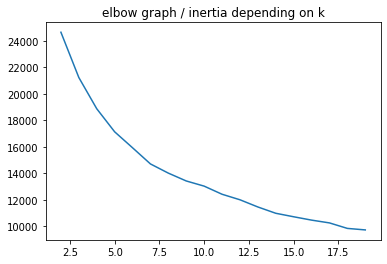

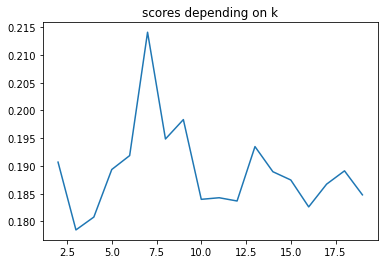

In [ ]:
def plot_elbow_scores(df_, cluster_nb):
    km_inertias, km_scores = [], []

    for k in range(2, cluster_nb):
        km = KMeans(n_clusters=k).fit(df_)
        km_inertias.append(km.inertia_)
        km_scores.append(silhouette_score(df_, km.labels_))

    sns.lineplot(range(2, cluster_nb), km_inertias)
    plt.title('elbow graph / inertia depending on k')
    plt.show()

    sns.lineplot(range(2, cluster_nb), km_scores)
    plt.title('scores depending on k')
    plt.show()
    
plot_elbow_scores(df_solar_transposed, 20)

The best ***nb k*** of clusters seems to be ***7*** even if there isn't any real elbow on the 1st plot.

##Country level
Now we have to do the same procedure but in a country level



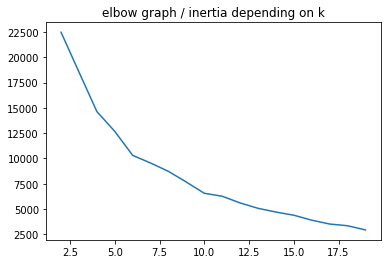

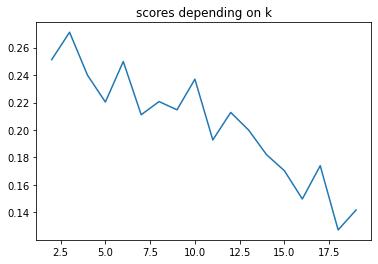

In [ ]:
df_solar_transposed = df_solar_co[-24*365*10:].T
plot_elbow_scores(df_solar_transposed, 20)

The best ***nb k*** of clusters seems to be 6 even if there isn't any real elbow on the 1st plot.

Last, we can keep the optimal number ***k*** of clusters, and retrieve infos on each group such as number and names of those countries:

In [ ]:
X = df_solar_transposed

km = KMeans(n_clusters=6).fit(X)
X['label'] = km.labels_
print("\n ***Cluster nb / Nb of countries in the cluster*** \n", X.label.value_counts())

print("\n Countries (group) by cluster \n")
for k in range(6):
    print(f'\n Cluster nb {k} : ', " ".join([country_dict[c] + f' ({c}),' for c in list(X[X.label == k].index)]))


 ***Cluster nb / Nb of countries in the cluster*** 
 1    9
3    8
0    8
5    7
2    2
4    1
Name: label, dtype: int64

 Countries (group) by cluster 


 Cluster nb 0 :  Belgium (BE), Germany (DE), Denmark (DK), France (FR), Ireland (IE), Luxembourg (LU), Netherlands (NL), United Kingdom (UK),

 Cluster nb 1 :  Austria (AT), Bosnia and Herzegovina (BA), Switzerland (CH), Czech Republic (CZ), Croatia (HR), Hungary (HU), Italy (IT), Slovenia (SI), Slovakia (SK),

 Cluster nb 2 :  Spain (ES), Portugal (PT),

 Cluster nb 3 :  Albania (AL), Bulgaria (BG), Greece (EL), Montenegro (ME), Macedonia (MK), Romania (RO), Serbia (RS), Kosovo (XK),

 Cluster nb 4 :  Cyprus (CY),

 Cluster nb 5 :  Estonia (EE), Finland (FI), Lithuania (LT), Latvia (LV), Norway (NO), Poland (PL), Sweden (SE),
